In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
np.random.seed(42)
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 5, 31)
data_range = pd.date_range(start=start_date, end=end_date,freq='D')

In [6]:
products =['Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5', 'Product_6', 'Product_7', 'Product_8', 'Product_9', 'Product_10']
data = []

for date in data_range:
    product = np.random.choice(products)
    quantity = np.random.randint(1,100)
    revenue = np.random.uniform(350,1500)
    data.append([date, product, quantity,revenue])

In [7]:
columns = ['Date', 'Product', 'Quantity', 'Revenue']
df = pd.DataFrame(data, columns = columns)
df.head()

,Date,Product,Quantity,Revenue
0,2022-01-01,Product_7,52,1443.321452
1,2022-01-02,Product_8,61,1036.377682
2,2022-01-03,Product_10,83,464.971153
3,2022-01-04,Product_8,24,1098.521744
4,2022-01-05,Product_5,2,1180.298588


### EDA

Оценим общий объем продаж за весь период в штуках и выручки    

In [10]:
# С помощью f-строки выводим показатели, выручку округляем до 2-ух значений после запятой
print(f"Количество проданного товара за весь период  - {df['Quantity'].sum()} шт")
print(f"Выручка за весь период - {round(df['Revenue'].sum(), 2)} руб")

Количество проданного товара за весь период  - 25781 шт
Выручка за весь период - 481731.91 руб


Проверим наличие пропусков в данных помощью метода .info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      516 non-null    datetime64[ns]
 1   Product   516 non-null    object        
 2   Quantity  516 non-null    int64         
 3   Revenue   516 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 16.2+ KB


Из полеченного результата видно, что пропуски в данных отсутствуют. Имеем во всех столбцах 516 не нулевых значений. 
Получили корректные типы данных: 
- Дата - datetime,
- Товары - строка
- Количество - целое число
- Выручка - число с плавающей точкой. 

Если бы в данных содержались пропуски, с ними пришлось бы работать следующими методами: 
- Если пропусков мало до 5% от всех данных и они критически не влияют на результат, можно удалить строки с пропусками
- Заменить пропуски на средним или медианой. 
- Категоризировать данные, например по продуктам, либо месяцу продаж, заменить на среднее или медиану в категории. Для данной задачи считаю данный способ самым оптимальным
- Замена на ближайшего соседа


Проведем анализ продаж по датам.
Для начала Выведем описательные статистики по полученному датасету.
Они дают понимание следующих метрик по Количеству и Выручке:
- количество строк, можно интерпритировать как количество уникальных сделок
- среднее значение показателя за весь период
- стандартное отклонение показателя
- минимальное и максимальные значения, 25-й, 50-й(медиана), 75-й перцентиль

In [8]:
df.describe()

,Quantity,Revenue
count,516.000000,516.000000
mean,49.963178,933.588970
std,29.479969,339.252495
min,1.000000,351.288128
25%,24.750000,635.637162
50%,52.000000,927.388198
75%,75.000000,1248.134069
max,99.000000,1493.733087


In [28]:
# Сгруппируем данные по дате и выведем суммарные показатели количества и выручки по дням
# Этот датафрейм будем использовать для визуализации временного ряда
df_by_date = df.groupby('Date').agg(
    tot_qty = ('Quantity', sum),
    tot_revenue = ('Revenue', sum)
)
df_by_date.head()

,tot_qty,tot_revenue
Date,,
2022-01-01,52,1443.321452
2022-01-02,61,1036.377682
2022-01-03,83,464.971153
2022-01-04,24,1098.521744
2022-01-05,2,1180.298588


Найдем даты, выручка в которых была минимальной и максимальной

In [29]:
df_by_date.loc[df_by_date['tot_revenue'] == df_by_date['tot_revenue'].min()]

,tot_qty,tot_revenue
Date,,
2023-04-27,31,351.288128


In [31]:
df_by_date.loc[df_by_date['tot_revenue'] == df_by_date['tot_revenue'].max()]

,tot_qty,tot_revenue
Date,,
2022-04-10,17,1493.733087


Используя полученную информацию из описательной статистики, сформируем продажи по датам выше 75-го перцентиля (высокомаржинальные)

In [34]:
df_by_date.loc[df_by_date['tot_revenue'] > np.percentile(df_by_date.tot_revenue, 75)]

,tot_qty,tot_revenue
Date,,
2022-01-01,52,1443.321452
2022-01-09,92,1469.818847
2022-01-10,55,1480.715519
2022-01-11,3,1338.931468
2022-01-13,4,1433.532019
...,...,...
2023-05-16,13,1332.341241
2023-05-20,81,1457.722151
2023-05-22,59,1459.198543


Постоим временной ряд для общей выручки от продаж

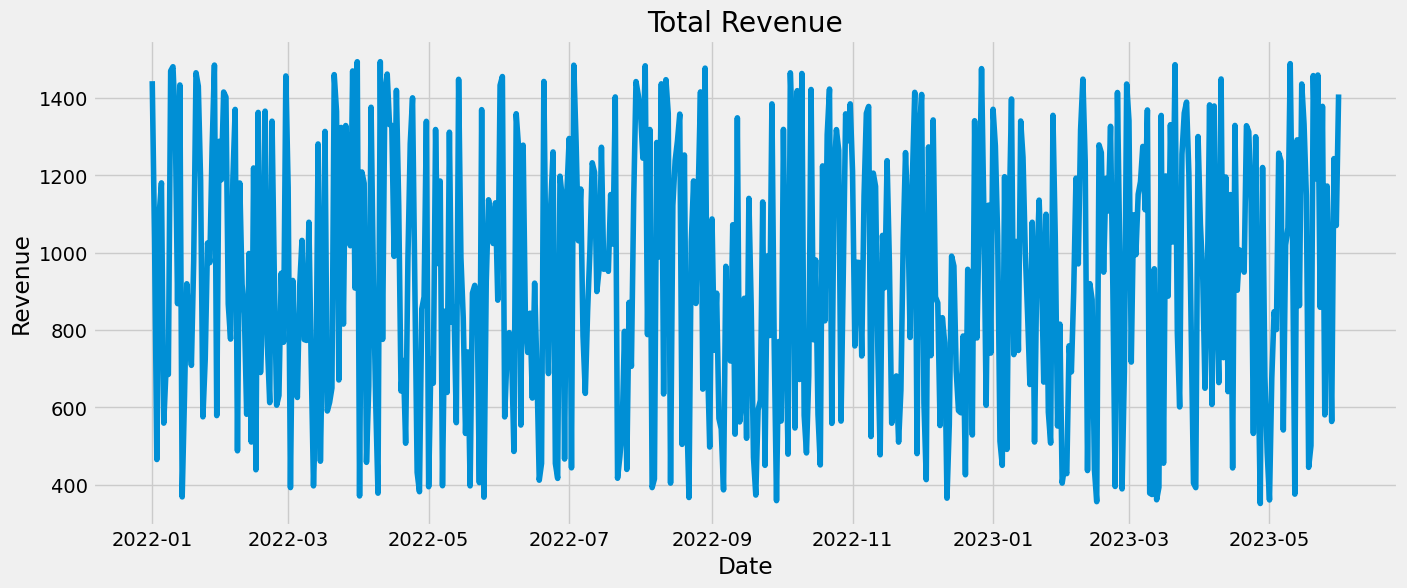

In [23]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Total Revenue")
plt.plot(df_by_date["tot_revenue"])
plt.show()

Выполним дополнительное исследование распределения продаж по временным периодам с помощью визуализации BoxPlot

In [24]:
# Выделяем из даты компоненты год и месяц
df_by_date =df_by_date.reset_index()
df_by_date['Year'] = df_by_date['Date'].dt.year
df_by_date['Month'] = df_by_date['Date'].dt.month

c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


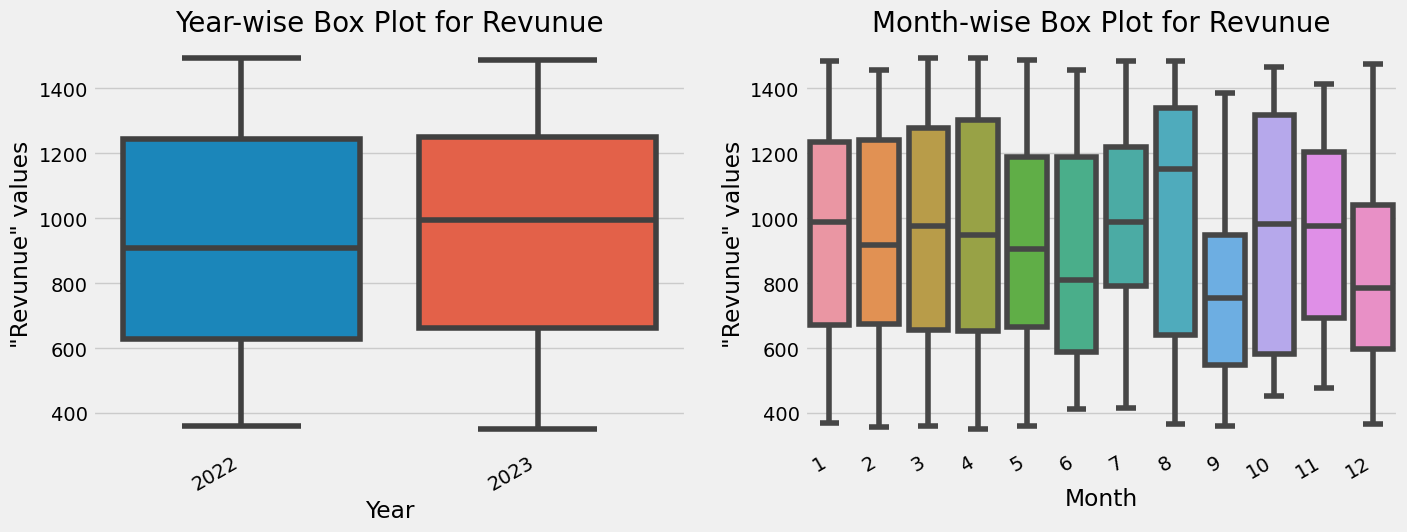

In [25]:
# Создаем холст для отображения 2-х диаграмм
df_by_date
fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(15, 6))

# Строим диаграмму в разрезе годов
sns.boxplot(df_by_date['Year'], 
            df_by_date["tot_revenue"], ax=ax[0])

# описываем оси и название диаграммы
ax[0].set_title('Year-wise Box Plot for Revunue',
                fontsize=20, loc='center')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('"Revunue" values')

# Строим диаграмму в разрезе месяцев
sns.boxplot(df_by_date['Month'], 
            df_by_date["tot_revenue"], ax=ax[1])

# описываем оси и название диаграммы
ax[1].set_title('Month-wise Box Plot for Revunue', 
                fontsize=20, loc='center')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('"Revunue" values')

# Делаем автоповорот подписей оси Х для лучшего восприятия
fig.autofmt_xdate()

plt.show()

По первой диаграмме видно, что в 23 году мы получем выручки за каждую сделку в среднем выше чем в 22. Вероятно сказывается рост инфляции и повышение цен. Также мы поработали с отделом продаж и ввели им KPI по выручке. Вот и стараются)

Из второй диаграммы четко прослеживается сезонность и высокая доходность с января по апрель,  в мае - июне снижение (праздники, начало отпусков), всплеск продаж, как следствие и доходности в августе (успеть все сделать перед 1-ым сентября), падение в сентябре (дети в школу, не до покупок), конец года возврат средней доходности на уровень начала года. 

Не смотря на то, что данные синтетические, они очень похожи по распределению выручки на продажи строительных материалов. 

Идентифицируем наиболее популярные товары, м также проверим статистически значимые различия в продажах между товарами.
Для этого удобно использовать сводную таблицу, которую мы отсортируем по убыванию количества проданных единиц. 

In [38]:
df_by_product = pd.pivot_table(df,index=['Product'],
                            values=['Quantity', 'Revenue'],
                            aggfunc={'Quantity':[np.sum, np.mean,np.median,np.max],'Revenue':[np.sum, np.mean,np.median,np.max]},
                            fill_value=0).reset_index()
df_by_product.columns = df_by_product.columns.map('_'.join)

df_by_product = df_by_product.sort_values(by='Quantity_sum', ascending=False)
df_by_product


,Product_,Quantity_amax,Quantity_mean,Quantity_median,Quantity_sum,Revenue_amax,Revenue_mean,Revenue_median,Revenue_sum
8,Product_8,99,52.810345,54.5,3063,1477.037462,957.922858,1006.284194,55559.525783
4,Product_4,99,57.176471,61.0,2916,1415.575769,900.386654,954.543710,45919.719359
0,Product_1,99,50.375000,52.5,2821,1493.733087,994.513925,985.731154,55692.779818
3,Product_3,99,48.909091,50.0,2690,1493.626082,914.635560,897.457963,50304.955775
1,Product_10,99,43.983051,44.0,2595,1469.818847,798.436274,689.978739,47107.740188
6,Product_6,97,54.723404,58.0,2572,1465.022322,909.339089,959.110930,42738.937202
2,Product_2,96,54.568182,61.0,2401,1488.670629,978.560214,1015.978910,43056.649430
7,Product_7,99,48.063830,49.0,2259,1443.321452,909.953169,917.864936,42767.798927
5,Product_5,98,43.843137,47.0,2236,1484.635515,1007.848315,1074.244611,51400.264060
9,Product_9,99,46.416667,50.0,2228,1469.713412,982.990374,953.560704,47183.537952


Выведем ТОП-5 самых популярных продуктов

In [41]:
df_by_product[['Product_','Quantity_sum']].head()

,Product_,Quantity_sum
8,Product_8,3063
4,Product_4,2916
0,Product_1,2821
3,Product_3,2690
1,Product_10,2595


Из полученных данных видно, что товар с наименьшим количеством штук в одном заказе - Product_10, самый высокодоходный товар - Product_5

Исследовать корреляции между выручкой и количеством проданных товаров

Для исследования построим точечную диаграмму для визуальной оценки корреляции, а также рассчитаем корреляции Пирсона и Спирмана

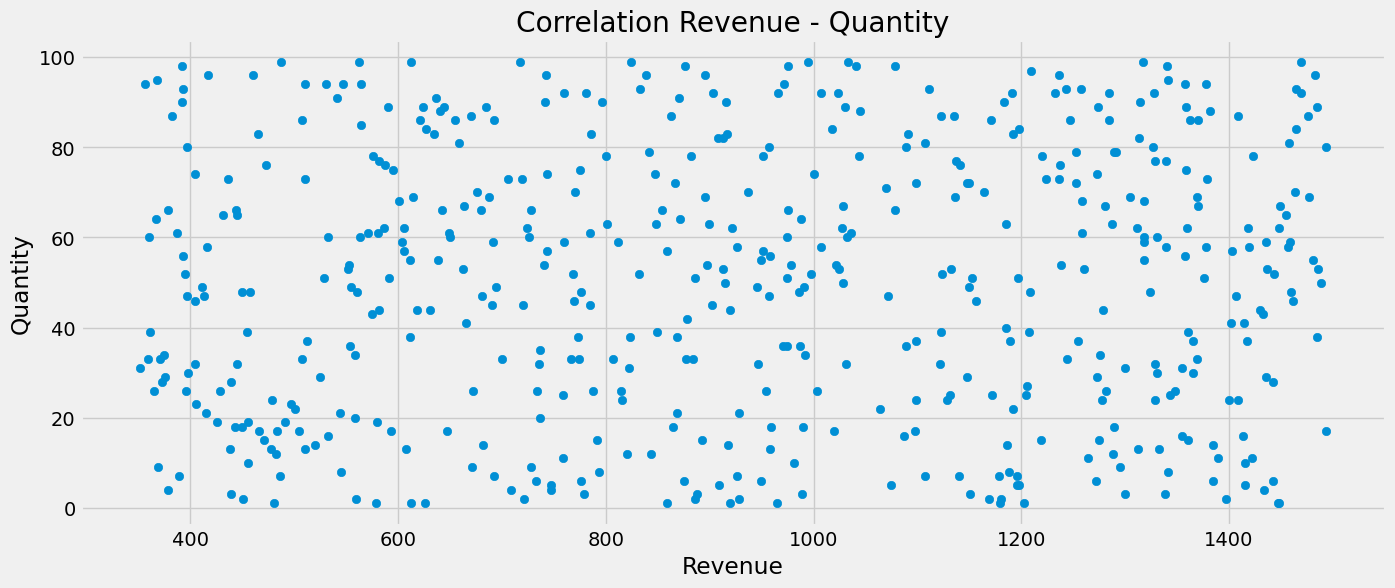

          Quantity  Revenue
Quantity   1.00000  0.04939
Revenue    0.04939  1.00000
          Quantity   Revenue
Quantity  1.000000  0.049184
Revenue   0.049184  1.000000


In [42]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 6))
plt.xlabel("Revenue")
plt.ylabel("Quantity")
plt.title("Correlation Revenue - Quantity")
plt.scatter(df["Revenue"], df['Quantity'])
plt.show()
print(df.corr())
print(df.corr(method="spearman"))

Синтетические данные показывают отсутствие корреляции между выручкой и количеством проданных товаров

In [21]:
df.to_csv('sales_data.csv', index=False)

### Выводы

В ходе проделанной работы мы определили минимальные и максимальные значения по количеству и выручке товаров, определили сезонность, ранжировали товары по популярности, получили список высокодоходных сделок. 

Основные Выводы: 
- Количество проданного товара за весь период  - 25781 шт
- Выручка за весь период - 481731.91 руб
- Среднее количество товара в одном заказе - 50 шт
- Средняя выручка с продажи 933 руб
- В продажах наблюдается сезонность с января по апрель и в середине осени
- Среди товаров есть лидеры: по популярности - Product_8, по количеству в одном заказе - Product_10, по маржинальности - Product_5

На основи полученных результатов мы можем дать следующие рекомендации:
- разобрать "формулу успеха" по высокодоходным сделкам и составить рекомендации для отделу продаж по увеличению доходности. 
- оптимизировать ассортиментную матрицу, вывести непопулярные товары
- сформировать маркетинговые акции по усилению продаж товаров с низкими продажами
- настроить сезонную стимуляцию продаж 
- к популярным товарам дать рекомендации сопутствующих
